In [6]:
# sklearn worst one: nyc-taxi-green-dec-2016_d10_l855_n1709_20241010145519
# sklearn dp but no merge: nyc-taxi-green-dec-2016_d10_l858_n1715_20241010162144

# backend = 'onnxruntime'
# backend = 'sklearn'
backend = 'sql_duckdb'
# backend = 'lleaves'
# backend = 'treelite'

model = 'nyc-taxi-green-dec-2016_d10_l858_n1715_20241013143513'

if backend == 'onnxruntime':
    result_file = 'result.csv'
else:
    result_file = f'result_{backend}.csv'

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
0,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,0,0.000000,nyc-taxi-green-dec-2016,1G,2,7.891653
1,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,1,0.425445,nyc-taxi-green-dec-2016,1G,2,4.362967
2,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,2,0.425445,nyc-taxi-green-dec-2016,1G,2,3.808450
3,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,1,0.850889,nyc-taxi-green-dec-2016,1G,2,5.003751
4,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,2,0.850889,nyc-taxi-green-dec-2016,1G,2,4.287020
5,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,1,1.276334,nyc-taxi-green-dec-2016,1G,2,4.152834
6,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,2,1.276334,nyc-taxi-green-dec-2016,1G,2,3.468578
7,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,1,1.701778,nyc-taxi-green-dec-2016,1G,2,2.209762
8,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,2,1.701778,nyc-taxi-green-dec-2016,1G,2,1.860262
9,nyc-taxi-green-dec-2016_d10_l858_n1715_2024101...,1,2.127223,nyc-taxi-green-dec-2016,1G,2,1.659646


In [8]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 8.274455542350188)

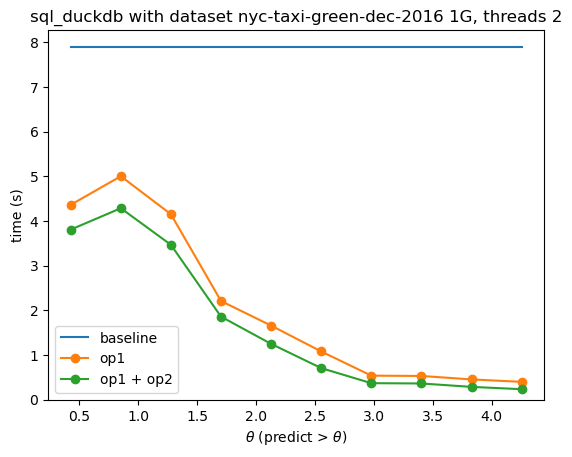

In [9]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 35.11995304493489)

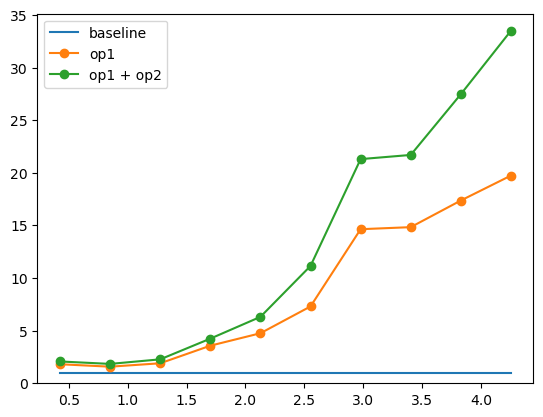

In [10]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)